In [7]:
import pandas as pd

df=pd.read_csv(r'C:\Users\HP\Documents\datascience\codesoft\advertising.csv', encoding='ISO-8859-1')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [13]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt



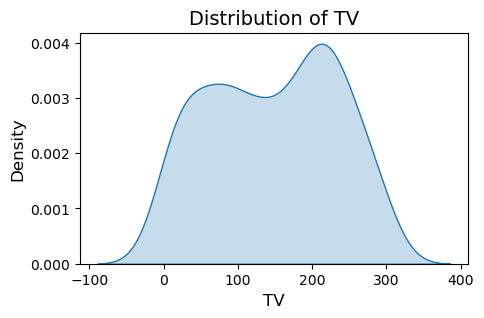

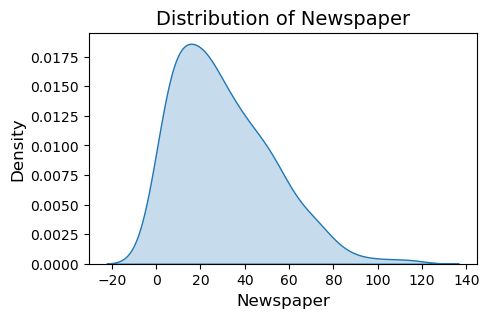

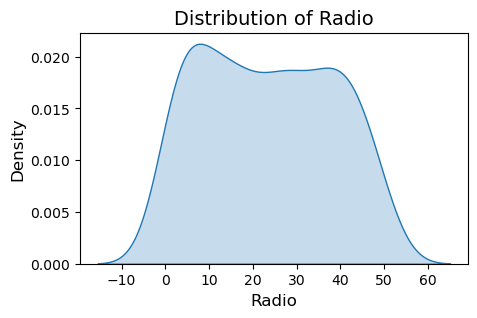

In [21]:
features=['TV','Newspaper','Radio']
for column in features:
    plt.figure(figsize=(5,3))
    sns.kdeplot(df[column],fill=True)
    plt.title(f"Distribution of {column}",fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Density",fontsize=12)
    plt.show()

<Axes: >

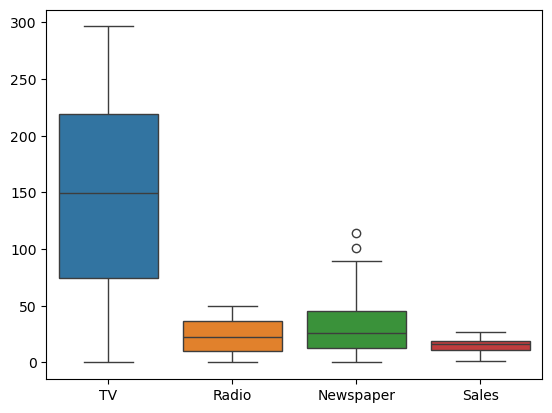

In [23]:
sns.boxplot(df)

In [31]:
# Check if 'Unnamed: 0' exists in the DataFrame columns
if 'Unnamed: 0' in df.columns:
    ind = df.drop(columns=['Unnamed: 0', 'Sales'])
else:
    ind = df.drop(columns=['Sales'])

# Assign 'Sales' to dep variable
dep = df['Sales']


In [33]:
ind,dep

(        TV  Radio  Newspaper
 0    230.1   37.8       69.2
 1     44.5   39.3       45.1
 2     17.2   45.9       69.3
 3    151.5   41.3       58.5
 4    180.8   10.8       58.4
 ..     ...    ...        ...
 195   38.2    3.7       13.8
 196   94.2    4.9        8.1
 197  177.0    9.3        6.4
 198  283.6   42.0       66.2
 199  232.1    8.6        8.7
 
 [200 rows x 3 columns],
 0      22.1
 1      10.4
 2      12.0
 3      16.5
 4      17.9
        ... 
 195     7.6
 196    14.0
 197    14.8
 198    25.5
 199    18.4
 Name: Sales, Length: 200, dtype: float64)

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(ind,dep,test_size=0.2,random_state=42)

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

In [45]:
lr=LinearRegression()
svr=SVR()
rfr=RandomForestRegressor()

In [47]:
models=[lr,svr,rfr]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Mean Percentage Error of {model}is:',mean_absolute_percentage_error(y_test,y_pred))

Mean Percentage Error of LinearRegression()is: 0.10880888971170641
Mean Percentage Error of SVR()is: 0.12612003305305355
Mean Percentage Error of RandomForestRegressor()is: 0.07742062973844796


In [51]:
from sklearn.preprocessing import StandardScaler
new_df=df
features_to_scale=['TV','Newspaper','Radio']
sc=StandardScaler()
new_df[features_to_scale]=sc.fit_transform(new_df[features_to_scale])

In [53]:
new_df

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,22.1
1,-1.197376,1.082808,0.669579,10.4
2,-1.516155,1.528463,1.783549,12.0
3,0.052050,1.217855,1.286405,16.5
4,0.394182,-0.841614,1.281802,17.9
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,7.6
196,-0.617035,-1.240003,-1.033598,14.0
197,0.349810,-0.942899,-1.111852,14.8
198,1.594565,1.265121,1.640850,25.5


In [57]:
from sklearn.model_selection import train_test_split

# Use ind for independent variables (features) and dep for dependent variable (target)
x_train, x_test, y_train, y_test = train_test_split(ind, dep, test_size=0.2, random_state=42)


In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_percentage_error

In [61]:
lr=LinearRegression()
svr=SVR()
rfr=RandomForestRegressor()

In [63]:
models=[lr,svr,rfr]
for model in models:
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(f'Mean Percentage Error of {model}is:',mean_absolute_percentage_error(y_test,y_pred))

Mean Percentage Error of LinearRegression()is: 0.10880888971170641
Mean Percentage Error of SVR()is: 0.12612003305305355
Mean Percentage Error of RandomForestRegressor()is: 0.07439084981872761
